### **CC57 - MACHINE LEARNING - MODELO REGRESION LOGISTICA**

**Modelo Telecom Churn**

Crear y evaluar el modelo de regresion logistica para clasificar a los clientes de una empresa de telecomunicaciones que pueden permanecer o abandonar sus servicios.

Son dos datasets:

- **churn-bigml-80.csv**: para ser considerado en el entrenamiento
- **churn-bigml-20.csv**:  para ser considerado en la prueba

In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
#Se crea el dataframe de entrenamiento
train = pd.read_csv('churn-bigml-80.csv')

In [4]:
#Se crea un atributo flag_muestra y se le asigna el valor "train"
train["flag_muestra"] = "train"

In [5]:
train.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,train
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,train
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,train
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,train
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,train


In [6]:
#Se crea el dataframe de prueba
test = pd.read_csv('churn-bigml-20.csv')

In [7]:
#Se crea un atributo flag_muestra y se le asigna el valor "test"
test["flag_muestra"] = "test"

In [8]:
test.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,test
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True,test
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True,test
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,False,test
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,test


In [10]:
#Unimmos ambos datasets en el dataframe data
data = pd.concat([train, test])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 666
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   float6

In [11]:
data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,train
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,train
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,train
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,train
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,train


In [13]:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
flag_muestra               object
dtype: object

In [14]:
data['Area code'] = data['Area code'].astype(object)

In [15]:
data.dtypes

State                      object
Account length              int64
Area code                  object
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
flag_muestra               object
dtype: object

In [16]:
#Creamos un atributo que  totalice todos los minutos
data['Total minutes'] = data['Total day minutes'] + data['Total eve minutes'] + data['Total night minutes'] + data['Total intl minutes']

In [17]:
data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra,Total minutes
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,train,717.2
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,train,625.2
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,train,539.4
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,train,564.8
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,train,512.0


In [18]:
#Totalizamos todas las llamadas
total_calls = data['Total day calls'] + data['Total eve calls'] + data['Total night calls'] + data['Total intl calls']
data.insert(loc=len(data.columns), column='Total calls', value=total_calls)

In [19]:
data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra,Total minutes,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,False,train,717.2,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,False,train,625.2,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,False,train,539.4,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,False,train,564.8,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,False,train,512.0,359


In [20]:
#Totalizamos lo facturado en las llamadas
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge'] + data['Total intl charge']

In [21]:
data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra,Total minutes,Total calls,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,11.01,10.0,3,2.70,1,False,train,717.2,303,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,False,train,625.2,332,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,False,train,539.4,333,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,8.86,6.6,7,1.78,2,False,train,564.8,255,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,False,train,512.0,359,52.09


In [22]:
#Renombramos los nombres de las siguientes columnsa
data = data.rename(columns = {'International plan':'International_plan'})
data = data.rename(columns = {'Voice mail plan':'Voice_mail_plan'})

In [23]:
data.head(5)

,State,Account length,Area code,International_plan,Voice_mail_plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra,Total minutes,Total calls,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,11.01,10.0,3,2.70,1,False,train,717.2,303,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,False,train,625.2,332,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,False,train,539.4,333,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,8.86,6.6,7,1.78,2,False,train,564.8,255,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,False,train,512.0,359,52.09


In [24]:
#Categorizamos los valores de los atributos International_plan.values y data.Voice_mail_plan.values (esquema de codificación ordinal)
data['c_International_plan'] = LabelEncoder().fit_transform(data.International_plan.values)
data['c_Voice_mail_plan'] = LabelEncoder().fit_transform(data.Voice_mail_plan.values)

In [25]:
data.head(5)

,State,Account length,Area code,International_plan,Voice_mail_plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total intl calls,Total intl charge,Customer service calls,Churn,flag_muestra,Total minutes,Total calls,Total charge,c_International_plan,c_Voice_mail_plan
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,3,2.70,1,False,train,717.2,303,75.56,0,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,3,3.70,1,False,train,625.2,332,59.24,0,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,5,3.29,0,False,train,539.4,333,62.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,7,1.78,2,False,train,564.8,255,66.80,1,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,3,2.73,3,False,train,512.0,359,52.09,1,0


In [26]:
#Prueba de normalidad
ss.shapiro(data['Number vmail messages'])

ShapiroResult(statistic=0.6219369769096375, pvalue=0.0)

In [27]:
#Prueba de normalidad
ss.shapiro(data['Total minutes'])

ShapiroResult(statistic=0.999548614025116, pvalue=0.6626932621002197)

In [28]:
#Prueba de normalidad
ss.shapiro(data['Total charge'])

ShapiroResult(statistic=0.9996581673622131, pvalue=0.8728287220001221)

In [29]:
#Prueba de normalidad
ss.shapiro(data['Customer service calls'])

ShapiroResult(statistic=0.8767107725143433, pvalue=1.401298464324817e-45)

In [30]:
#Conclusión:
#Con una confianza del 95%, las variables 'Number vmail messages' y 'Customer service calls'
#no se aproximan a una distribución normal, pues el pvalor < 5%

#Con una confianza del 95%, las variables 'Total minutes' y 'Total charge'
#se aproximan a una distribución normal, pues el pvalor > 5%


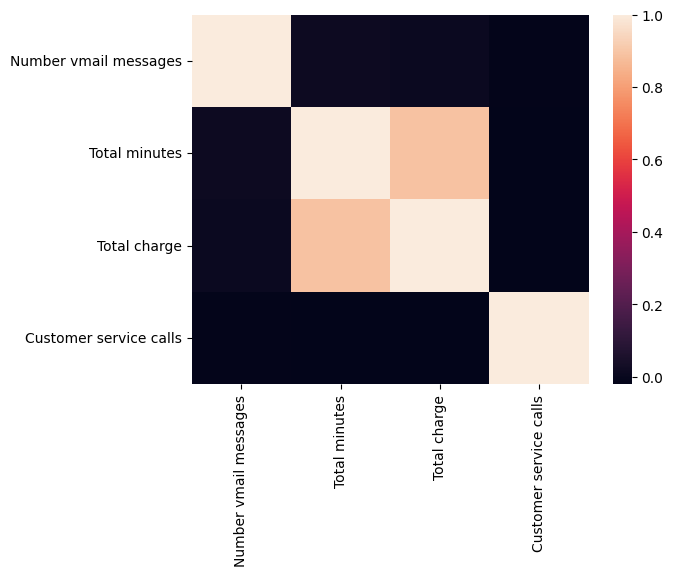

In [31]:
#Heatmap
sns.heatmap(data.loc[:,['Number vmail messages','Total minutes','Total charge','Customer service calls']].corr())
plt.show()

In [32]:
#Prueba de Correlación
#Ho: no existe correlación entre las variables
#Ha: existe correlación entre las variables

In [33]:
data.loc[:,['Number vmail messages','Total minutes','Total charge','Customer service calls']].corr(method = "pearson")

,Number vmail messages,Total minutes,Total charge,Customer service calls
Number vmail messages,1.000000,0.014779,0.009766,-0.013263
Total minutes,0.014779,1.000000,0.890804,-0.020969
Total charge,0.009766,0.890804,1.000000,-0.019873
Customer service calls,-0.013263,-0.020969,-0.019873,1.000000


In [34]:
ss.pearsonr(data['Total minutes'],data['Total charge'])

#Con un nivel de confianza del 95%, se rechaza la Ho, pues el pvalor < 5%,
#se concluye que las variables 'Total minutes' y 'Total charge' están correlacionadas
#Por otro lado, el grado de correlación entres las variables es de 0.890804470503018

PearsonRResult(statistic=0.8908044705030179, pvalue=0.0)

In [35]:
data['Churn'].dtype

dtype('bool')

In [36]:
#Convertimos la variable 'Churn' a nuemrica
data['Churn'] = data['Churn'].astype('int64')

In [37]:
data['Churn'].dtype

dtype('int64')

In [38]:
#Contador de valores de la variable Chrun
data.Churn.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [39]:
#Contador de valores de la variable Chrun normalizado
100*data['Churn'].value_counts(normalize=True)

Churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64

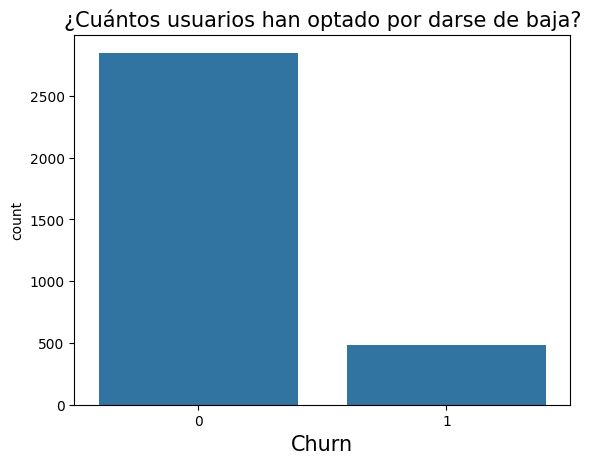

In [40]:
#Visualizacion de la proporcion de Churn
sns.countplot(data = data, x = 'Churn')
plt.xlabel('Churn', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por darse de baja?', fontsize = 15)
plt.show()

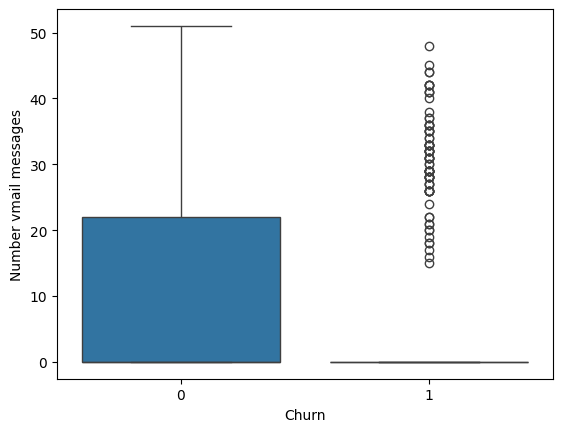

In [41]:
#Boxplot de Churn vs Number vmail messages
sns.boxplot(x='Churn',y='Number vmail messages',data=data)
plt.show()

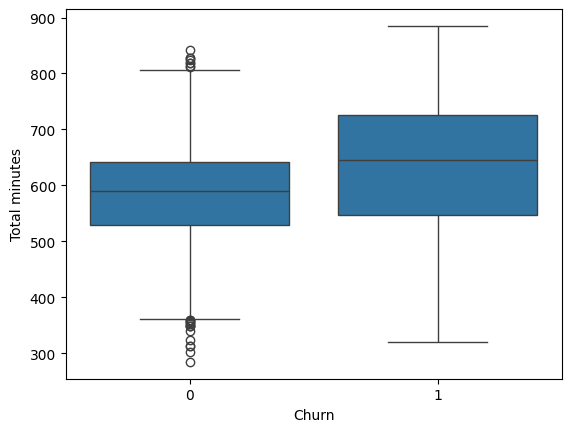

In [42]:
#Boxplot de Churn vs Total minutes
sns.boxplot(x='Churn',y='Total minutes',data=data)
plt.show()

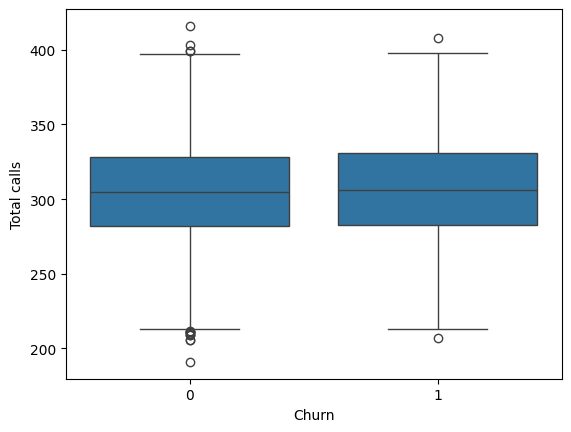

In [43]:
#Boxplot de Churn vs Total calls
sns.boxplot(x='Churn',y='Total calls',data=data)
plt.show()

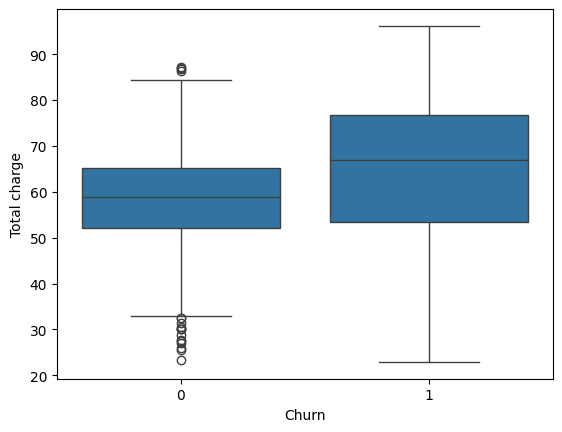

In [44]:
#Boxplot de Churn vs Total charge
sns.boxplot(x='Churn',y='Total charge',data=data)
plt.show()

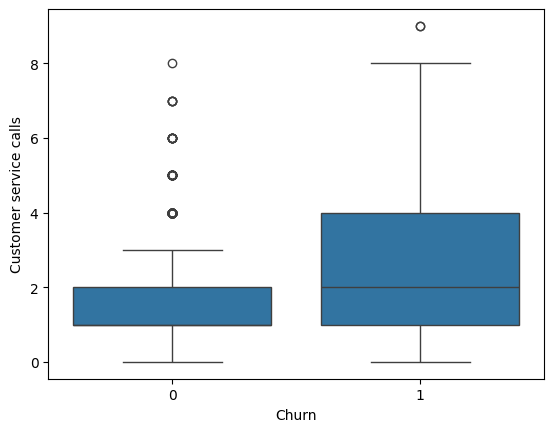

In [45]:
#Boxplot de Churn vs Customer service calls
sns.boxplot(x='Churn',y='Customer service calls',data=data)
plt.show()

In [47]:
#Seleccionamos las variables predictoras y la de resultado (no se entrenara con todas las variables)
X = data[['c_International_plan','c_Voice_mail_plan','Number vmail messages','Total minutes','Total charge','Customer service calls']]
y = data['Churn']

In [48]:
#Se convierte las variables predictoras a formato numpy
X = X.to_numpy()

In [49]:
X[0:5]

array([[  0.  ,   1.  ,  25.  , 717.2 ,  75.56,   1.  ],
       [  0.  ,   1.  ,  26.  , 625.2 ,  59.24,   1.  ],
       [  0.  ,   0.  ,   0.  , 539.4 ,  62.29,   0.  ],
       [  1.  ,   0.  ,   0.  , 564.8 ,  66.8 ,   2.  ],
       [  1.  ,   0.  ,   0.  , 512.  ,  52.09,   3.  ]])

In [50]:
#Se convierte la variable objetivo a formato numpy
y = y.to_numpy()

In [51]:
y[0:5]

array([0, 0, 0, 0, 0])

In [52]:
#Se divide el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [53]:
X_train[0:5]

array([[  0.  ,   1.  ,  43.  , 525.8 ,  55.49,   1.  ],
       [  0.  ,   0.  ,   0.  , 579.3 ,  61.58,   1.  ],
       [  0.  ,   0.  ,   0.  , 537.5 ,  61.01,   1.  ],
       [  0.  ,   0.  ,   0.  , 508.8 ,  53.99,   0.  ],
       [  0.  ,   0.  ,   0.  , 646.1 ,  67.84,   3.  ]])

In [54]:
X_test[0:5]

array([[  0.  ,   0.  ,   0.  , 558.2 ,  52.57,   1.  ],
       [  0.  ,   1.  ,  28.  , 504.6 ,  56.14,   3.  ],
       [  0.  ,   1.  ,  35.  , 627.4 ,  66.73,   0.  ],
       [  0.  ,   0.  ,   0.  , 673.7 ,  70.43,   4.  ],
       [  0.  ,   1.  ,  30.  , 687.2 ,  64.55,   0.  ]])

In [ ]:
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().fit_transform(X_test)

In [ ]:
#X_train[0:5]

In [ ]:
#X_test[0:5]

In [56]:
#Se crea el clasificador de Regresión Logística
classifier = LogisticRegression(max_iter = 1000).fit(X_train, y_train)

In [57]:
#Se realizan predicciones con los datos de prueba
y_pred = classifier.predict(X_test)

In [58]:
#Visualizamos lo predicho vs los datos de prueba
y_pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
y_test[0:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [60]:
#Verificamos la matriz de confusion (objetivo de prueba vs lo predicho)
confusion_matrix(y_test, y_pred)

array([[562,  12],
       [ 76,  17]])

Matriz de Confusion, sin normalizacion
[[562  12]
 [ 76  17]]
Matriz de Confusion Normalizada
[[0.97909408 0.02090592]
 [0.8172043  0.1827957 ]]


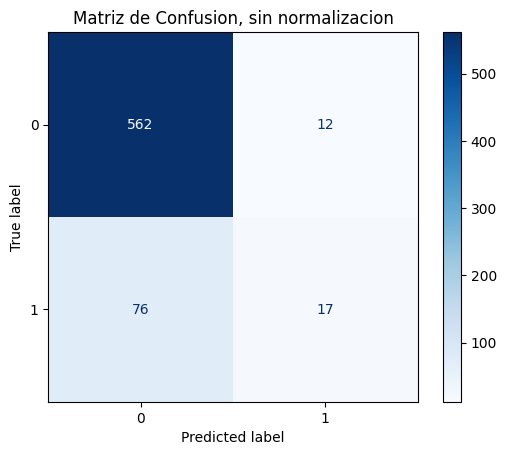

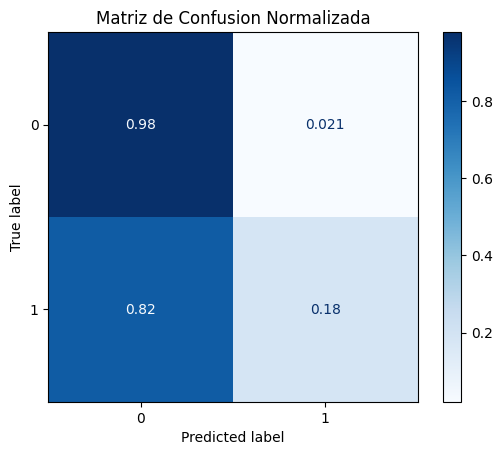

In [62]:
# Plot non-normalized confusion matrix
titles_options = [("Matriz de Confusion, sin normalizacion", None),
                  ("Matriz de Confusion Normalizada", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [63]:
#Probabilidad de las Predicciones
y_pred_prob = classifier.predict_proba(X_test)

In [64]:
y_pred_prob[0:5]

array([[0.94877981, 0.05122019],
       [0.93035219, 0.06964781],
       [0.95830391, 0.04169609],
       [0.57298574, 0.42701426],
       [0.96798418, 0.03201582]])

In [65]:
y_pred_prob[0:5,1]

array([0.05122019, 0.06964781, 0.04169609, 0.42701426, 0.03201582])

In [66]:
#Ratios obtenidos de la prediccion
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [67]:
#Calcullo de Compute Area Under the Curve (AUC)
#traza la tasa de verdaderos positivos ( TP ) frente a la tasa de falsos positivos ( FP ) en diferentes umbrales de clasificación.
#Utiliza la probabilidad para decirnos qué tan bien un modelo separa las clases.
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8699936308118841

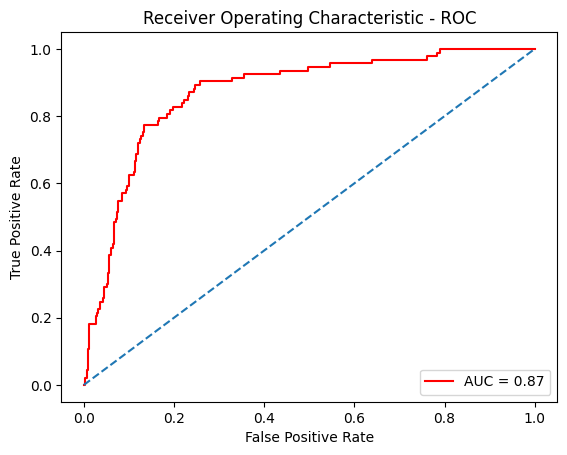

In [69]:
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
#Visualizacion del reporte de clasificacion
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       574
           1       0.59      0.18      0.28        93

    accuracy                           0.87       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.84      0.87      0.84       667



In [71]:
#Creamos un nuevo dataframe conteniendo el dataset de prueba con el resultado predicho y su probabilidad
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [72]:
dataf.head(5)

,0,1,2,3,4,5,0,0,0,1
0,0.0,0.0,0.0,558.2,52.57,1.0,0,0,0.948780,0.051220
1,0.0,1.0,28.0,504.6,56.14,3.0,0,0,0.930352,0.069648
2,0.0,1.0,35.0,627.4,66.73,0.0,0,0,0.958304,0.041696
3,0.0,0.0,0.0,673.7,70.43,4.0,0,0,0.572986,0.427014
4,0.0,1.0,30.0,687.2,64.55,0.0,0,0,0.967984,0.032016


In [73]:
#Renombramos los nombres de las columnas
dataf.columns = ['c_International_plan','c_Voice_mail_plan','Number vmail messages',
                 'Total minutes','Total charge','Customer service calls','Churn', 'Churn_Pred', 'Churn_Pred_Prob_0', 'Churn_Pred_Prob_1']

In [74]:
dataf.head(10)

,c_International_plan,c_Voice_mail_plan,Number vmail messages,Total minutes,Total charge,Customer service calls,Churn,Churn_Pred,Churn_Pred_Prob_0,Churn_Pred_Prob_1
0,0.0,0.0,0.0,558.2,52.57,1.0,0,0,0.948780,0.051220
1,0.0,1.0,28.0,504.6,56.14,3.0,0,0,0.930352,0.069648
2,0.0,1.0,35.0,627.4,66.73,0.0,0,0,0.958304,0.041696
3,0.0,0.0,0.0,673.7,70.43,4.0,0,0,0.572986,0.427014
4,0.0,1.0,30.0,687.2,64.55,0.0,0,0,0.967984,0.032016
5,0.0,0.0,0.0,498.2,60.55,3.0,0,0,0.803458,0.196542
6,0.0,0.0,0.0,666.1,66.52,0.0,0,0,0.919413,0.080587
7,0.0,0.0,0.0,677.1,75.86,2.0,1,0,0.699936,0.300064
8,0.0,1.0,38.0,590.9,56.94,0.0,0,0,0.977028,0.022972
9,0.0,1.0,32.0,821.8,90.12,1.0,1,0,0.757491,0.242509


In [76]:
#Calculamos los cuantiles de la variable 'Churn_Pred_Prob_1
quantiles = dataf['Churn_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.036054
0.4    0.066456
0.6    0.106206
0.8    0.213568
Name: Churn_Pred_Prob_1, dtype: float64

In [77]:
#Grabamos este dataframe a un archivo csv
dataf.to_csv('dataf.csv', index = False)

In [78]:
#Tarea
#1.Para la base de datos dataf, crear una variable "score", con las categorías: Muy alto, alto, medio, bajo y muy bajo.
#Usar: Churn_Pred_Prob_1